# TESLA STOCK PREDICTOR

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import kaggle
import zipfile36 as zipfile

import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d rpaguirre/tesla-stock-price


  0%|          | 0.00/33.7k [00:00<?, ?B/s]
100%|##########| 33.7k/33.7k [00:00<00:00, 62.0kB/s]
100%|##########| 33.7k/33.7k [00:00<00:00, 62.0kB/s]


In [3]:
zipfile_name = 'tesla-stock-price.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [7]:
df.shape

(1692, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

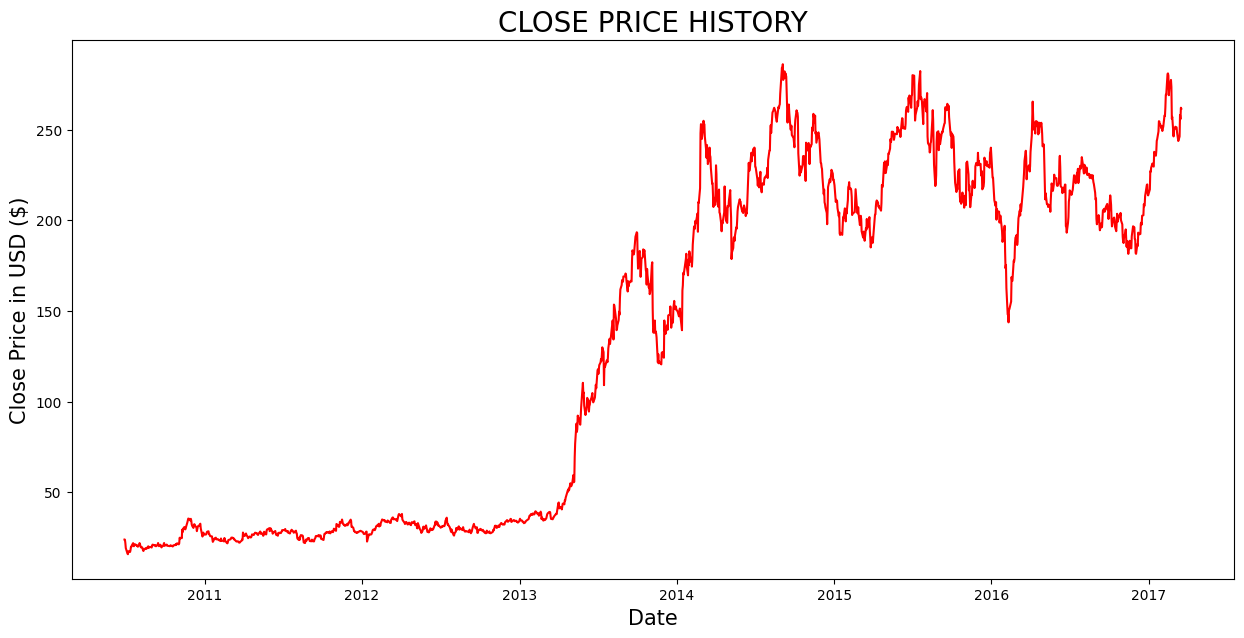

In [12]:
plt.figure(figsize = (15,7))
plt.title('CLOSE PRICE HISTORY', size=20)
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price in USD ($)', fontsize=15)
plt.show()

In [13]:
df1 = df.filter(['Close'])
dataset = df1.values

# Scaling:

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))

In [16]:
scaled_data = scaler.fit_transform(dataset)

# Train and Test Split:

In [17]:
td_len = int(len(dataset)*0.8)
td_len

1353

In [18]:
train = scaled_data[0:td_len, :]

In [19]:
X_train = []
Y_train = []

for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    Y_train.append(train[i, 0])
    
    if i<=60:
        print(X_train)
        print(Y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [20]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train.shape

(1293, 60, 1)

# Model Building:

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
model = Sequential()

In [24]:
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# Model Compilation:

In [25]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

# Model Training:

In [26]:
model.fit(X_train, Y_train, batch_size=1, epochs=10)

Epoch 1/10
1293/1293 [==============================] - 36s 21ms/step - loss: 0.0031
Epoch 2/10
1293/1293 [==============================] - 27s 21ms/step - loss: 0.0013
Epoch 3/10
1293/1293 [==============================] - 26s 20ms/step - loss: 9.8068e-04
Epoch 4/10
1293/1293 [==============================] - 26s 20ms/step - loss: 9.0666e-04
Epoch 5/10
1293/1293 [==============================] - 26s 20ms/step - loss: 7.0423e-04
Epoch 6/10
1293/1293 [==============================] - 26s 20ms/step - loss: 7.0931e-04
Epoch 7/10
1293/1293 [==============================] - 26s 20ms/step - loss: 6.7720e-04
Epoch 8/10
1293/1293 [==============================] - 27s 21ms/step - loss: 6.0042e-04
Epoch 9/10
1293/1293 [==============================] - 26s 20ms/step - loss: 5.6855e-04
Epoch 10/10
1293/1293 [==============================] - 26s 20ms/step - loss: 5.1621e-04


# Preparing the test data:

In [27]:
test = scaled_data[td_len-60:, :]

In [28]:
X_test = []
Y_test = dataset[td_len:, :]

for i in range(60, len(test)):
    X_test.append(test[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
X_test.shape

(339, 60, 1)

# Predicting the prices:

In [30]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 20ms/step


# RMSE:

In [31]:
rmse = np.sqrt(np.mean(predictions - Y_test)**2)
rmse

3.5374668124395057

# Visualizing the predictions:

In [32]:
Train = df1[:td_len]
Valid = df1[td_len:]

Valid['Predictions'] = predictions

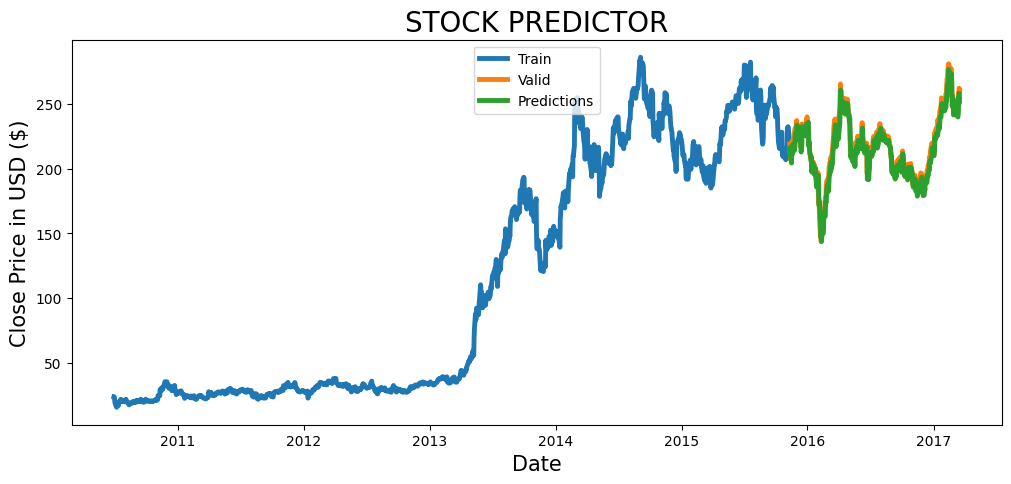

In [33]:
plt.figure(figsize = (12,5))
plt.title('STOCK PREDICTOR', size=20)

plt.plot(Train['Close'], linewidth=3.5)
plt.plot(Valid[['Close','Predictions']], linewidth=3.5)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price in USD ($)', fontsize=15)
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper center')
plt.show()

In [34]:
Valid

,Close,Predictions
Date,,
2015-11-11,219.080002,211.961349
2015-11-12,212.940002,216.507141
2015-11-13,207.190002,209.568314
2015-11-16,214.309998,204.323303
2015-11-17,214.000000,212.683044
...,...,...
2017-03-13,246.169998,239.904388
2017-03-14,258.000000,242.855194
2017-03-15,255.729996,255.558960


# Prediction:

In [35]:
tesla = pd.read_csv('Tesla.csv - Tesla.csv.csv')
new_df = tesla.filter(['Close'])

last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predPrice = model.predict(X_test)
predPrice = scaler.inverse_transform(predPrice)

predPrice

1/1 [==============================] - 0s 16ms/step


array([[255.94463]], dtype=float32)